# AML HW3: Programming Exercises [Aashika, Joyce]

## Question 1: Eigenface for Face Recognition

### 1(a) Download The Face Dataset

* The downloaded dataset has two files, train.txt and test.txt
* Each of these files contain paths to images of people's faces in different lighting conditions stored in the images folder.
* In the train.txt file there are paths to 540 images
* In the test.txt file there are paths to 100 images

### 1(b) Load the Dataset

In [88]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
import imageio
from scipy.stats import multivariate_normal as mvn
from sklearn.cluster import KMeans

(540, 2500) (540,)
(100, 2500) (100,)


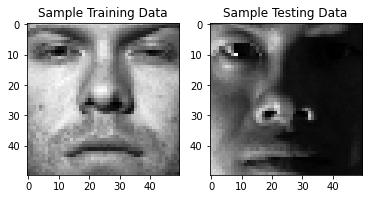

In [2]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)

plt.subplot(1,2,1)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Sample Training Data')
plt.subplot(1,2,2)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Sample Testing Data')
plt.show()

### 1(c) Average Face

In [33]:
avg_face=np.sum(train_data,axis=0)
avg_face=np.divide(avg_face,len(train_data))
np.shape(avg_face)

(2500,)

Text(0.5, 1.0, 'Average Face for Train Data')

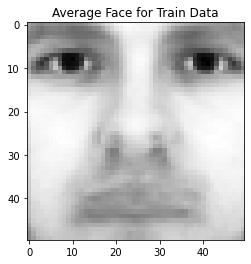

In [34]:
plt.imshow(avg_face[:].reshape(50,50), cmap = cm.Greys_r)
plt.title('Average Face for Train Data')

### 1(d) Mean Subtraction

Text(0.5, 1.0, 'Face Image (Training Data) after Mean Subtraction')

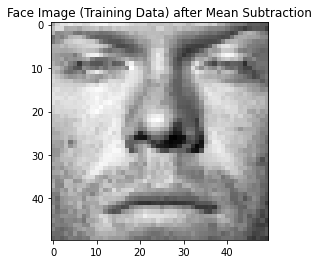

In [39]:
mean_subtr_train = train_data - avg_face
plt.imshow(mean_subtr_train[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Face Image (Training Data) after Mean Subtraction')

Text(0.5, 1.0, 'Face Image (Testing Data) after Mean Subtraction')

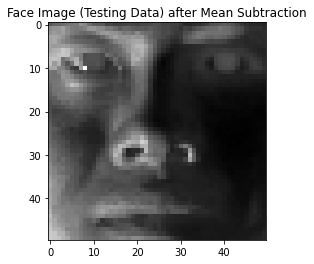

In [40]:
mean_subtr_test = test_data - avg_face
plt.imshow(mean_subtr_test[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Face Image (Testing Data) after Mean Subtraction')

In [38]:
np.shape(mean_subtr_train)

(540, 2500)

### 1(e) EigenFace

In [8]:
from numpy import linalg as la

In [201]:
def calc_eig_val_vec(dataset):
    cov_mat = np.dot(dataset, dataset.T)
    eig_values, eigen_vectors = la.eig(cov_mat)
    eig_vectors = np.dot(dataset.T, eigen_vectors)
    for i in range(eig_vectors.shape[1]):
        eig_vectors[:, i] = eig_vectors[:, i]/la.norm(eig_vectors[:, i])
    return eig_values.astype(float), eig_vectors.astype(float)

eig_values, eig_vectors = calc_eig_val_vec(mean_subtr_train)

In [202]:
def pca(eig_values, eig_vectors, k):
    k_eig_val = eig_values.argsort()[-k:][::-1]
    eigen_faces = []
    
    for i in k_eig_val:
        eigen_faces.append(eig_vectors[:, i])

    eigen_faces = np.array(eigen_faces)
    
    return eigen_faces

eigen_faces = pca(eig_values, eig_vectors, 540)

In [203]:
def reconstruct_images(eigen_faces, mean_vector):
	org_dim_eig_faces = []
    
	for i in range(eigen_faces.shape[0]):
		org_dim_eig_faces.append(eigen_faces[i].reshape(50,50))

	org_dim_eig_faces = np.array(org_dim_eig_faces)
    
	return org_dim_eig_faces

org_dim_eig_faces = reconstruct_images(eigen_faces,train_data)

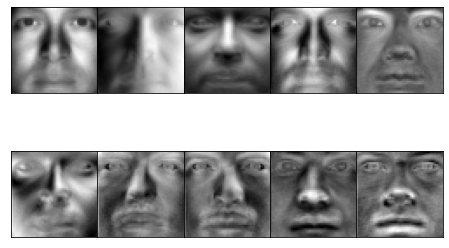

<Figure size 432x288 with 0 Axes>

In [204]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 5, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)   

i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(org_dim_eig_faces[i], cmap = plt.get_cmap("gray"))
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1

plt.show()
plt.clf()

### 1(f) Eigenface Feature

In [287]:
def cal_F_train(norm_input_train, eigen_faces_train,r):
    return np.dot(norm_input_train, (eigen_faces_train[:r]).T)

def cal_F_test(norm_input_test, eigen_faces_test,r):
    return np.dot(norm_input_test, (eigen_faces_test[:r]).T)

### 1(g) Face Recognition

#### Splitting Training Dataset into Training and Testing Dataset

In [14]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [222]:
F_train = cal_F_train(mean_subtr_train,eigen_faces,10)

In [223]:
F_train

array([[-3071.98503336,   440.55436121,  -127.39265075, ...,
          178.04529608,  -119.05731126,   -30.29017967],
       [ 2197.05744965,   760.60052365,  -562.46174352, ...,
          182.9450855 ,   113.96838521,   384.43352369],
       [ 2473.33262159,  -163.06716256,   608.22806399, ...,
          -85.3894248 ,  -584.65403477,   325.92945615],
       ...,
       [ 1841.10091761, -1907.14587095,  -226.44323   , ...,
           51.07709295,    33.22865825,   -26.8049682 ],
       [-2586.30249394,  -163.15381029,  -151.68973865, ...,
         -265.28513326,   144.82934451,   105.81505369],
       [ 1363.71276667, -2930.60526623,  1287.14464964, ...,
          311.35304262,   162.68186295,   198.41107223]])

In [224]:
np.shape(F_train)

(540, 10)

In [225]:
x_train, x_dev, y_train, y_dev = train_test_split(F_train, train_labels, train_size=0.7, random_state=90)

#### Logistic Regression

In [226]:
logreg = LogisticRegression(multi_class='ovr',penalty = 'none', max_iter = 10000, random_state=90)
logreg.fit(x_train, y_train) 
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_dev)

In [230]:
# F1 score for Training dataset
sklearn.metrics.f1_score(y_train, y_train_pred,average=None)

array([0.78651685, 0.72727273, 0.69444444, 0.7173913 , 0.78688525,
       0.74358974, 0.64705882, 0.91139241, 1.        , 0.85714286])

In [234]:
# F1 score for Training dataset - weighted
print('F1 score on train data for r=10')
sklearn.metrics.f1_score(y_train, y_train_pred,average='weighted')

F1 score on train data for r=10


0.7834380844475856

In [228]:
# F1 score for Development dataset
sklearn.metrics.f1_score(y_dev, y_test_pred,average=None)

array([0.57142857, 0.58064516, 0.38095238, 0.62068966, 0.82051282,
       0.73684211, 0.64285714, 0.8125    , 0.92307692, 0.82051282])

In [235]:
# F1 score for Training dataset - weighted
print('F1 score on development data for r=10')
sklearn.metrics.f1_score(y_dev, y_test_pred,average='weighted')

F1 score on development data for r=10


0.7124041055974442

#### Model Performance on Test Data

In [236]:
F_test = cal_F_test(mean_subtr_test,eigen_faces,10)

In [238]:
y_testset_pred = logreg.predict(F_test)

In [239]:
print("F1 Score: Test Data ",sklearn.metrics.f1_score(test_labels, y_testset_pred, average='weighted'))

F1 Score: Test Data  0.8306013289443093


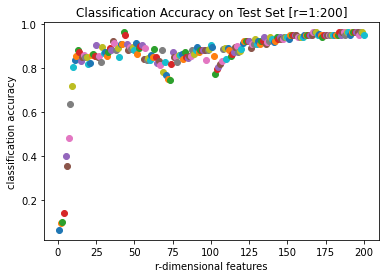

In [263]:
i=1
while i!=201:
    F_train = cal_F_train(mean_subtr_train,eigen_faces,i)
    logreg = LogisticRegression(multi_class='ovr',penalty = 'none', max_iter = 10000, random_state=90)
    logreg.fit(F_train, train_labels) 
    F_Test_r = cal_F_test(mean_subtr_test, eigen_faces,i)
    y_testset_pred_r = logreg.predict(F_Test_r)
    f1_score = sklearn.metrics.f1_score(test_labels, y_testset_pred_r, average='weighted')
    plt.scatter(i,f1_score)
    plt.title('Classification Accuracy on Test Set [r=1:200]')
    plt.xlabel("r-dimensional features")
    plt.ylabel("classification accuracy")
    i=i+1

# ----------------------------------------------------------------------------------------

## Question 2: Implement EM Algorithm

### 2(a) Parse and Plot data on a 2D plane

In [74]:
faithful_df=pd.read_csv("./faithful.csv")
faithful_df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [75]:
del faithful_df['Unnamed: 0']
faithful_df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


<AxesSubplot:xlabel='eruptions'>

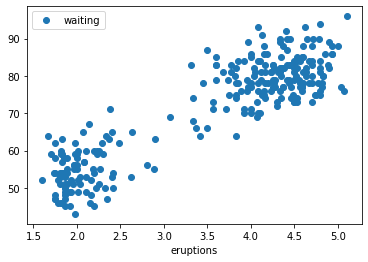

In [76]:
faithful_df.plot(x='eruptions', y='waiting', style='o')

### 2(b) Formulas for E-step

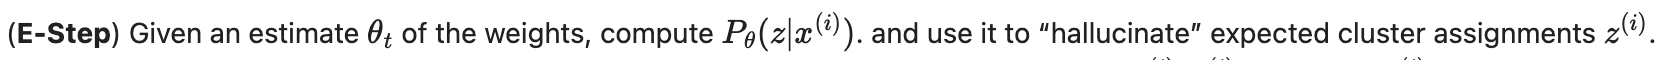

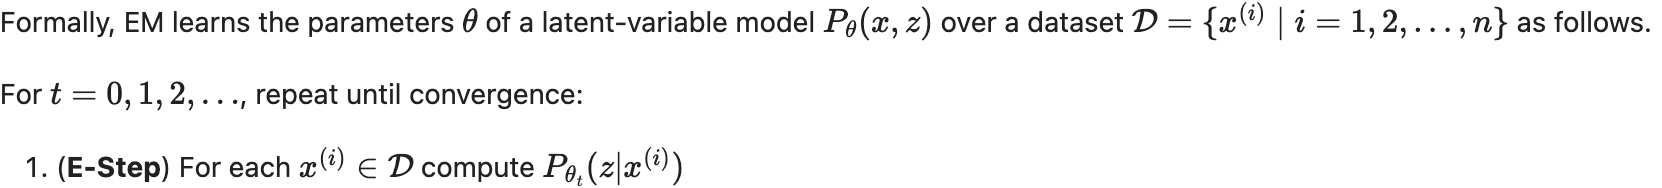

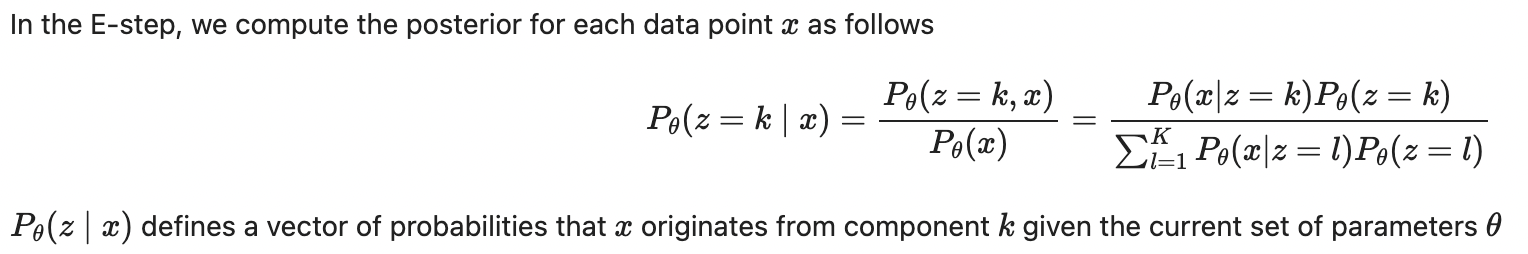

### 2(c) Formulas for M-step

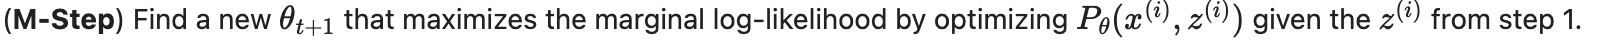

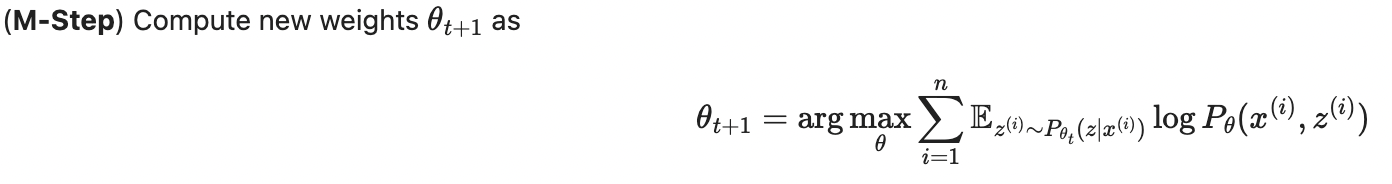

Formulas:
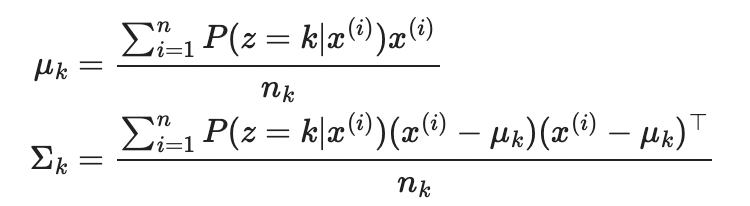

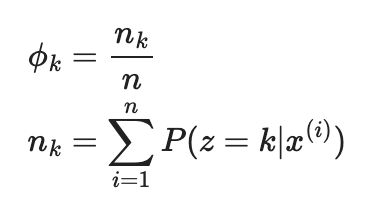

### 2(d) Implement and run the EM algorithm

In [78]:
def Estep(df,mu,sigma,pi):
    X=df.to_numpy()
    K=sigma.shape[0]
    N=X.shape[0]
    gamma = np.zeros(shape=(N, K))
    
    for k in range(K):
        gamma[:, k] = mvn.pdf(X, mu[k], sigma[k]) * pi[k]
    
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    
    return gamma
  

In [167]:
def Mstep(df,gamma):
    X=df.to_numpy()
    N=X.shape[0]
    K=gamma.shape[1]
    
    pi = np.sum(gamma, axis=0)/np.sum(gamma)
    mu = X[np.random.choice(N, size=K, replace=False), :]
    sigma = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float128)
    
    for k in range(K):
        mu[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
        sigma[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mu[k, :]).reshape(N, X.shape[1], 1)@(X-mu[k, :]).reshape(N, 1, X.shape[1])), axis=0) /np.sum(gamma[:, k])
    
    return mu, sigma, pi

In [168]:
def logLikelihood(df,gamma,sigma,mu,pi):
    X = df.to_numpy()
    K = mu.shape[0]
    llh=0
    for k in range(K):
        llh += np.sum(gamma[:, k] * (np.log(mvn.pdf(X, mean=mu[k], cov=sigma[k])) + np.log(pi[k])))
    return llh


In [77]:
def generateZ(mu,cov):
  x, y = np.meshgrid(np.linspace(1,6,1000),np.linspace(30,100,1000))
  xy = np.column_stack([x.flat, y.flat])
  Z = mvn.pdf(xy, mu, cov).reshape(x.shape)
  return x,y,Z

### 2 (d) (i) Implement the EM algorithm from scratch

In [282]:
#Mean Vectors
mu1=[]
mu2=[]

#EM algorithm from scratch
def EM(df, K, delta=0.001):
    X = df.to_numpy()
    N, D = X.shape
    mu = X[np.random.choice(N, size=K, replace=False), :]
    pi = np.ones(shape=(K), dtype=np.float128)/K
    sigma = np.zeros(shape=(K, D, D), dtype=np.float128)
    
    for d in range(D):
        sigma[:, d, d] = np.var(X[:, d])/10
    
    # Current likelihood
    cur_llh = np.float128(1e9) 
    # Previous likelihood
    prev_llh = 0.0
    #Number of iterations
    iter = 0
    llh = [] 
    
    #Termination Criteria
    while(abs(cur_llh-prev_llh) > delta):
        #E-Step
        gamma = Estep(df, mu, sigma, pi)
        #M-Step
        mu, sigma, pi = Mstep(df, gamma)
        
        prev_llh = cur_llh
        #Calculate current Likelihood
        cur_llh = logLikelihood(df, gamma, sigma, mu, pi)
        llh.append(cur_llh)
        
        labels = np.argmax(gamma, axis=1)
        
        #Increment Iteration by 1
        iter=iter+1
        
        plt.figure()
        c=['black','green','blue']
        
        plt.scatter(faithful_df['eruptions'], faithful_df['waiting'],c=gamma[:,1],cmap='cool')
        plt.title(iter)
        #mu1 - Mean Vector 1, #mu2 - Mean Vector 2
        mu1.append(mu[:,0])
        mu2.append(mu[:,1])
        plt.scatter(mu[:,0], mu[:,1], marker='x')
        for i in range(0,K):
            
            x,y,z=generateZ(mu[i],sigma[i])
            plt.contour(x, y, z,colors=c[i])
        plt.show()

    print('Total iterations: {}'.format(iter))
    return mu, sigma, pi, gamma, labels, llh

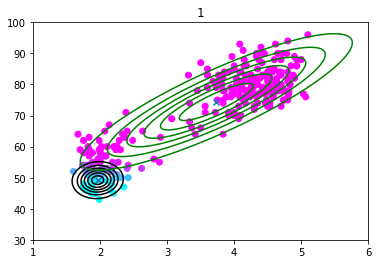

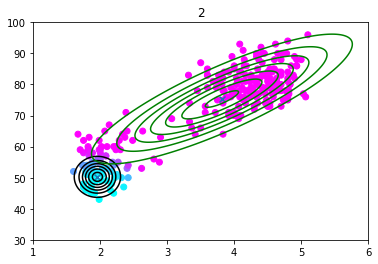

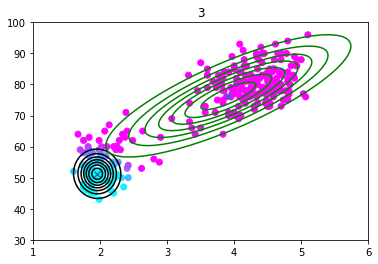

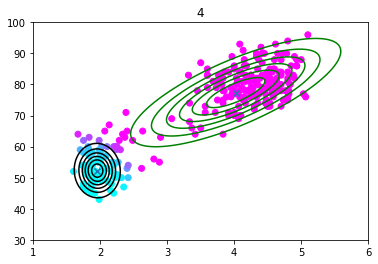

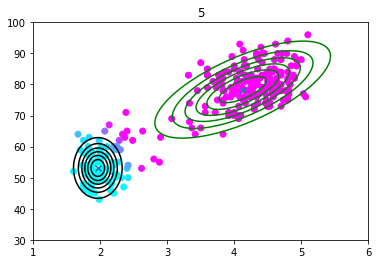

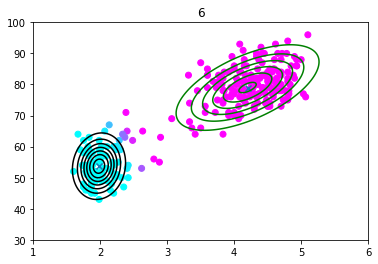

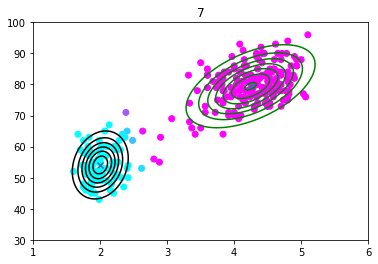

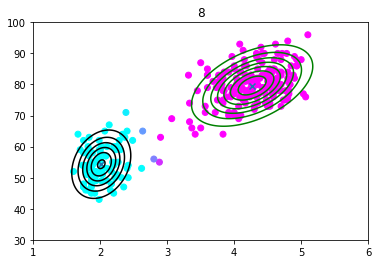

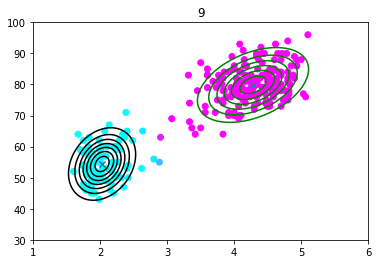

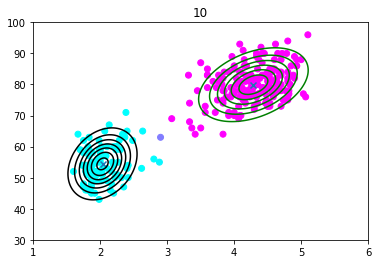

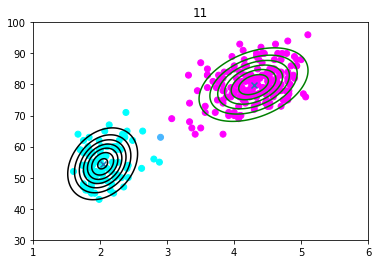

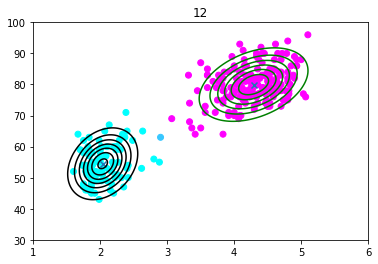

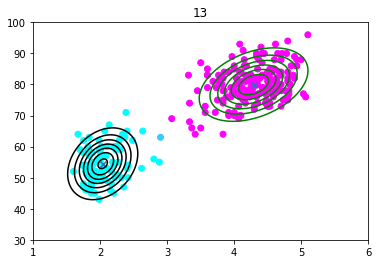

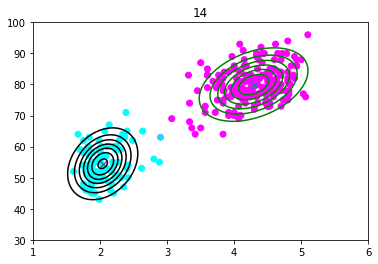

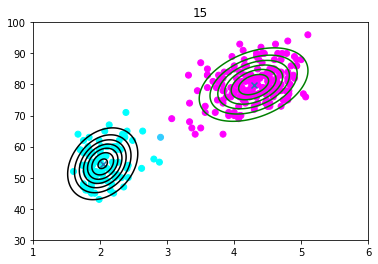

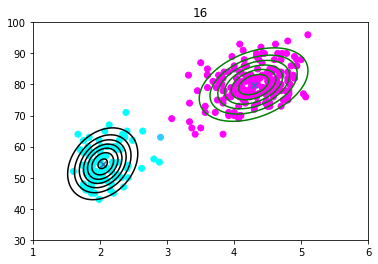

Total iterations: 16


In [283]:
mu, sigma, pi, gamma, labels, llh = EM(faithful_df,2)

### 2 (d) (ii) Choose a termination criterion for when the algorithm stops repeating the E-step and the M-step. State your termination criterion and explain the reasoning behind it.

* The termination criterion I used is if the previous log likelihood is better than the current log likelihood by a certain delta value (0.01) then the algorithm stops.
* I chose this as my termination criteria because the log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset. 
* So if the previous log likelihood is better than the current log likelihood, then it means that the model fit the dataset better in the previous iteration than the current, which is why I will stop the algorithm from repeating after this point.
* Termination Criteria:
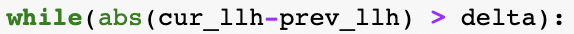

### 2(d) (iii) Plot the trajectories of the two mean vectors

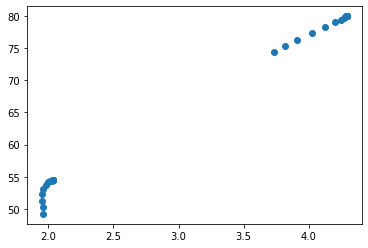

In [285]:
#mu1: The array of the values of mean vector 1 calculated over all iterations of EM
#mu1: The array of the values of mean vector 2 calculated over all iterations of EM
plt.scatter(mu1, mu2)

### 2(e) If you were to run K -means clustering instead of the EM algorithm you just implemented, do you think you will get different clusters? Comment on why do you think the results will or will not change.

* I think I will get similar clusters when I run the K-means clustering. I have explained my reasoning below.


* Observations using the K-Means Algorithm:
    * The algorithm makes very general assumptions regarding the distribution of the data. 
    * The K-means algorithm attempts to detect clusters within the dataset under the optimization criteria that the sum of the inter-cluster variances is minimized. 
    * Hence K-Means clustering algorithm produces a Minimum Variance Estimate (MVE) of the state of the identified clusters in the data.
    * The intuition behind the algorithm lies in the fact that on average the distance from the cluster centroid (𝜇𝑘) to elements within the cluster should be homogeneous among all identified clusters (this is a shortcoming that we will see later on). 
    * Although the method works well in detecting homogeneous clusters, it inevitably falls short due to the simplistic assumption about the spherical nature of the clusters inherent in its optimization function (i.e. it assumes that all the clusters have equal covariance matrices).
    
    
* Observations using the EM Algorithm:
    *  Unlike K-means, in EM, the clusters are not limited to spherical shapes. 
    * In EM we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). 
    * These different covariance matrices in return allow us to control the shape of our clusters and hence we can detect sub-populations in our data with different characteristics.
    * EM, in particular, tends to be sensitive to the presence of outliers as there are no constraints on the covariance matrix.


* Conclusion:
    * The EM algorithm offers a powerful alternative to the popular k-means with greater control over the characteristics of the cluster. 
    * However the EM algorithm, like the k-means, also yields a sub-optimal solution. 
    * In other words, there is no guarantee that the algorithm will produce models (i.e. clusters) that are best fit for the underlying sub-populations.
    * Overall both algorithms produce sub-optimal solutions and the results can be seen by comparing the two scatter plots generated for EM and K-Means algorithm

Text(0.5, 1.0, 'K-Means Clustering')

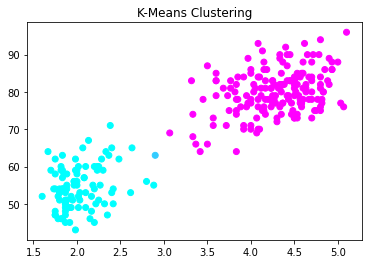

In [200]:
#Experimenting with K-Means Clustering
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(faithful_df)
label

plt.scatter(faithful_df['eruptions'], faithful_df['waiting'], c=gamma[:,1], cmap='cool', label = label)
plt.title('K-Means Clustering')

#### References:
* https://github.com/kuleshov/cornell-cs5785-2022-applied-ml
* https://laid.delanover.com/explanation-face-recognition-using-eigenfaces/
* https://github.com/pritishuplavikar/Face-Recognition-on-Yale-Face-Dataset/blob/master/pca_knn_yale.ipynb
* https://www.kaggle.com/code/melio01/gaussian-mixture-expectation-maximization/notebook
* https://towardsdatascience.com/a-comparison-between-k-means-clustering-and-expectation-maximization-estimation-for-clustering-8c75a1193eb7